In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

features = pd.read_csv(
    r"C:\Users\SREENITHI\Downloads\OneDrive_2026-02-24\CSV Files\NUSW-NB15_features.csv",
    encoding='latin1'
)

column_names = features['Name'].values


df1 = pd.read_csv(
    r"C:\Users\SREENITHI\Downloads\OneDrive_2026-02-24\CSV Files\UNSW-NB15_1.csv",
    header=None
)

df2 = pd.read_csv(
    r"C:\Users\SREENITHI\Downloads\OneDrive_2026-02-24\CSV Files\UNSW-NB15_2.csv",
    header=None
)

df3 = pd.read_csv(
    r"C:\Users\SREENITHI\Downloads\OneDrive_2026-02-24\CSV Files\UNSW-NB15_3.csv",
    header=None
)

df4 = pd.read_csv(
    r"C:\Users\SREENITHI\Downloads\OneDrive_2026-02-24\CSV Files\UNSW-NB15_4.csv",
    header=None
)

# Combine them
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Assign column names
df.columns = column_names

print("Dataset Shape:", df.shape)
df.head()

C:\Users\SREENITHI\AppData\Local\Temp\ipykernel_5252\1787154202.py:19: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(
C:\Users\SREENITHI\AppData\Local\Temp\ipykernel_5252\1787154202.py:24: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(


Dataset Shape: (2540047, 49)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [10]:
from IPython.display import display
print("\n--- First 5 Rows ---")
display(df.head())


--- First 5 Rows ---


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [11]:
# 3. Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum().sum())


--- Missing Values ---
4996788


In [13]:
# 4. Target Variable Distribution (Text/Table Format)
# Calculate counts and percentages
attack_counts = df['attack_cat'].value_counts()
attack_percent = df['attack_cat'].value_counts(normalize=True) * 100

# Combine into a single readable DataFrame
attack_summary = pd.DataFrame({
    'Count': attack_counts,
    'Percentage (%)': attack_percent.round(2)
})

print("--- Attack Type Distribution ---")
print(attack_summary)

--- Attack Type Distribution ---
                   Count  Percentage (%)
attack_cat                              
Generic           215481           67.07
Exploits           44525           13.86
 Fuzzers           19195            5.97
DoS                16353            5.09
 Reconnaissance    12228            3.81
 Fuzzers            5051            1.57
Analysis            2677            0.83
Backdoor            1795            0.56
Reconnaissance      1759            0.55
 Shellcode          1288            0.40
Backdoors            534            0.17
Shellcode            223            0.07
Worms                174            0.05


In [6]:
df.isnull().sum().sort_values(ascending=False)

attack_cat          2218764
is_ftp_login        1429879
ct_flw_http_mthd    1348145
ct_state_ttl              0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports           0
srcip                     0
res_bdy_len               0
ct_ftp_cmd                0
ct_srv_src                0
ct_srv_dst                0
ct_dst_ltm                0
ct_src_ ltm               0
ct_src_dport_ltm          0
ct_dst_sport_ltm          0
ct_dst_src_ltm            0
Sjit                      0
trans_depth               0
sport                     0
dmeansz                   0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                

In [17]:
# 5. Categorical Feature Analysis (Text/Table Format)
# Identify the Top 5 Attack types
top_5_attacks = df['attack_cat'].value_counts().head(5).index

# Filter the dataframe to only include these top 5 attacks
df_filtered = df[df['attack_cat'].isin(top_5_attacks)]

# Create a cross-tabulation table
protocol_attack_counts = pd.crosstab(df_filtered['proto'], df_filtered['attack_cat'])

# Add a 'Total' column for each protocol type and sort
protocol_attack_counts['Total'] = protocol_attack_counts.sum(axis=1)
protocol_attack_counts = protocol_attack_counts.sort_values(by='Total', ascending=False)

print("--- Top 5 Attack Types by Protocol (Counts) ---")
print(protocol_attack_counts)

--- Top 5 Attack Types by Protocol (Counts) ---
attack_cat   Fuzzers    Reconnaissance    DoS  Exploits  Generic   Total
proto                                                                   
udp              5082              4175   527       874   210600  221258
tcp             12374              5947  3336     27443     3118   52218
unas              720               840  5246      6532      720   14058
ospf              150               215   944      1504      154    2967
sctp               68               103   426       739       76    1412
...               ...               ...   ...       ...      ...     ...
ifmp                6                 7    44        55        6     118
idrp                6                 7    44        55        6     118
idpr-cmtp           6                 7    44        55        6     118
idpr                6                 7    44        55        6     118
zero                6                 7    44        55        6     118

[1

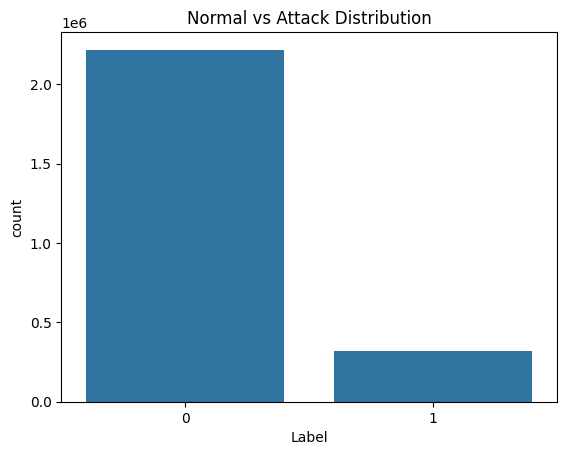

In [18]:
df['Label'].value_counts()

sns.countplot(x='Label', data=df)
plt.title("Normal vs Attack Distribution")
plt.show()